In [44]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import io

In [45]:
r = requests.get("http://213.136.85.153:9000/exp?query=select * from liqui")
rawData = r.text
df = pd.read_csv(io.StringIO(rawData), parse_dates=['timestamp'], index_col='timestamp')

In [46]:
df['USD'] = df.QUANTITY * df.PRICE

In [54]:
df.USD.max()

2476326.0225000004

In [55]:
sum(df.USD)

247891672.80282238

<AxesSubplot:xlabel='timestamp'>

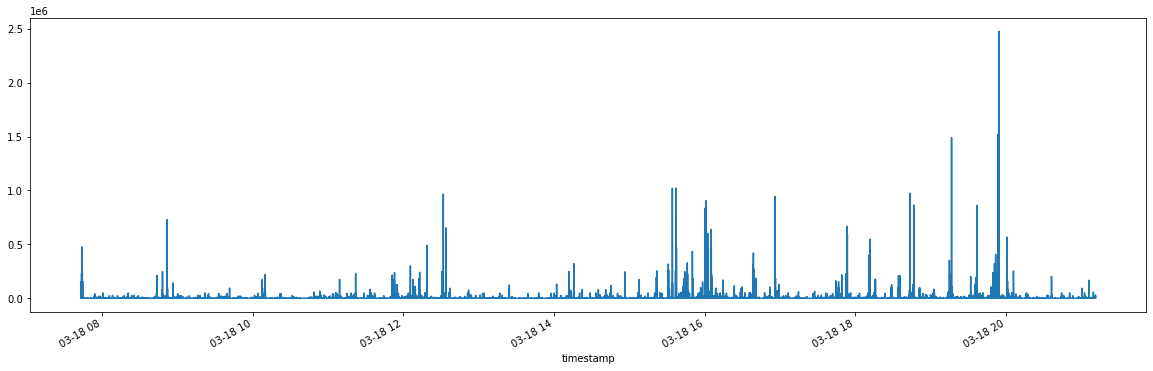

In [50]:
df.USD.plot(figsize=(20,6))